 # Step 1: Import necessary libraries

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets from the provided Google Drive links

In [10]:


# Now proceed with loading your data
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Check the first few rows to verify
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

In [11]:
# Step 3: Data quality assessment
print("Customers Data Info:")
print(customers.info())

print("Products Data Info:")
print(products.info())

print("Transactions Data Info:")
print(transactions.info())


Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      

# Step 4: Handling Missing Values and Duplicates

In [12]:

print("\nMissing values in Customers Data:")
print(customers.isnull().sum())

print("\nMissing values in Products Data:")
print(products.isnull().sum())

print("\nMissing values in Transactions Data:")
print(transactions.isnull().sum())





Missing values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Step 5: Summary Statistics

In [13]:
print("\nSummary Statistics of Products:")
print(products.describe())

print("\nSummary Statistics of Transactions:")
print(transactions.describe())


Summary Statistics of Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Summary Statistics of Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


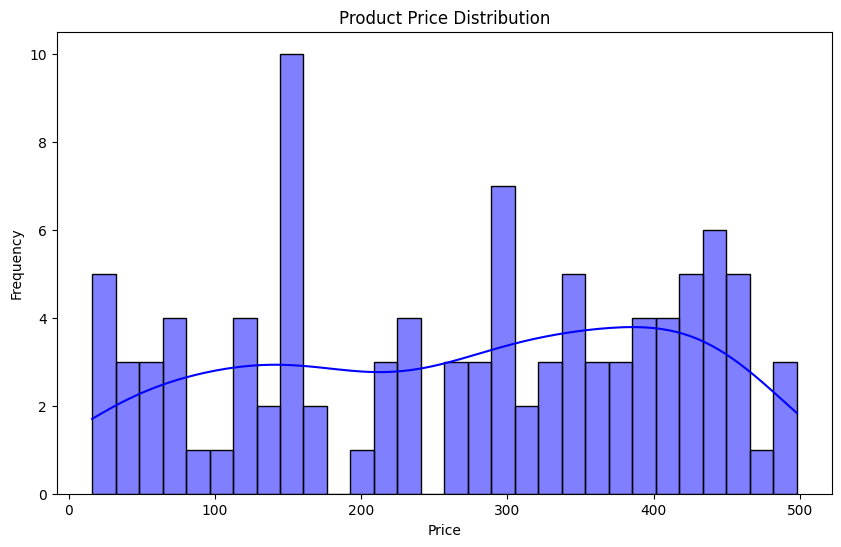

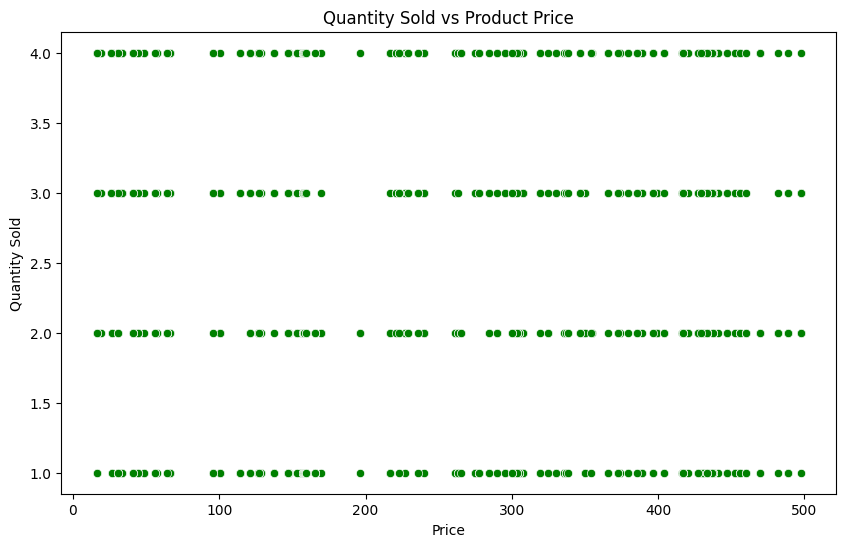

In [15]:
# Step 6: Data visualizations

# Product price distribution
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], bins=30, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Quantity sold vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(data=transactions, x='Price', y='Quantity', color='green')
plt.title('Quantity Sold vs Product Price')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()



<ipython-input-16-8657e54a81b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


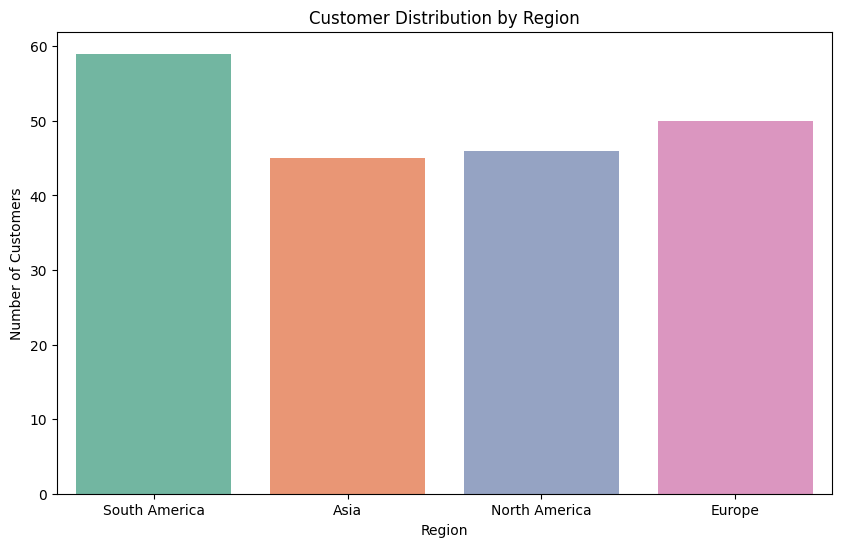

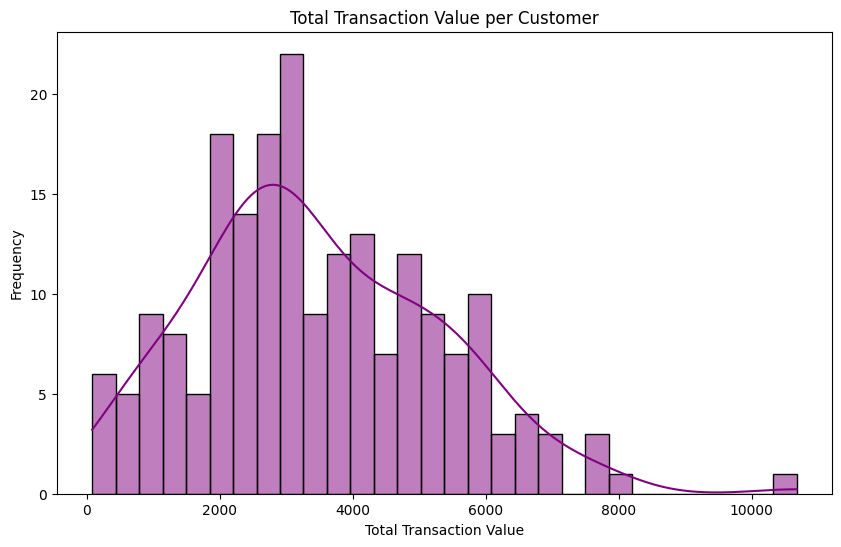

In [16]:
# Region-based customer distribution
plt.figure(figsize=(10,6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Total value of transactions per customer
customer_total_sales = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.histplot(customer_total_sales['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Total Transaction Value per Customer')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()